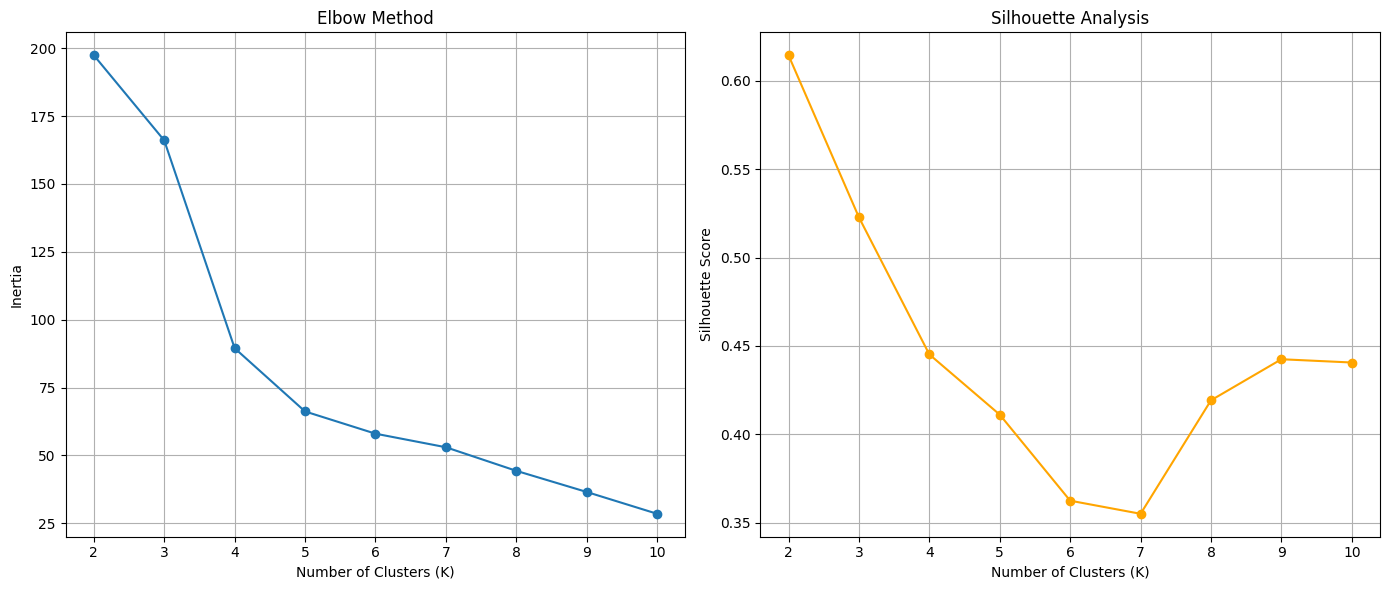

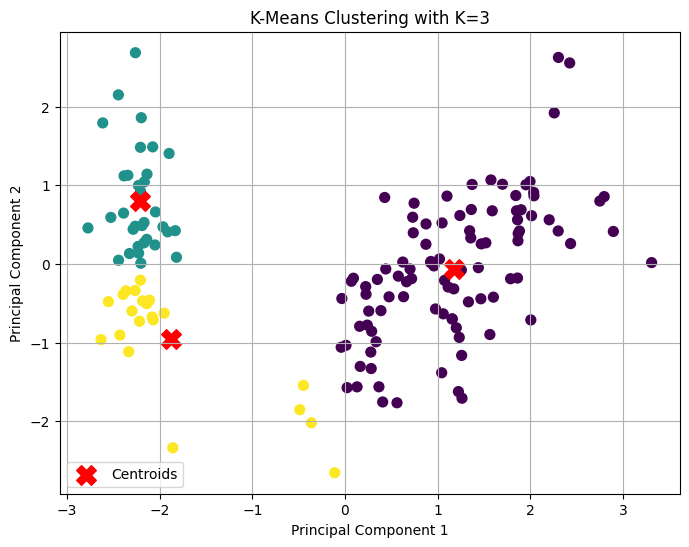

Final Silhouette Score for K=3: 0.523


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\Users\\ASUS\\Downloads\\iris_dataset.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Dimensionality Reduction with PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()

plt.tight_layout()
plt.show()
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title(f"K-Means Clustering with K={optimal_k}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()
final_silhouette_score = silhouette_score(X_pca, cluster_labels)
print(f"Final Silhouette Score for K={optimal_k}: {final_silhouette_score:.3f}")